In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv(r"C:\Users\Sagar\Documents\DS-Intern-Assignment--SagarGaur-\data\data.csv")
# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


# Starting with EDA

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [6]:
#Printing the data to see how it looks
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [7]:
#Copy data to make it clean and we can see there is null values in the columns
df_cleaned=df.copy()
df_cleaned.head()
df_cleaned.isnull().sum()

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [8]:
# Convert all except 'timestamp'and random variables to numeric, coercing errors
cols_to_convert = df.columns.drop(['timestamp','random_variable1','random_variable2'])
df_cleaned[cols_to_convert] = df_cleaned[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [9]:
#I have removed random variable because forward filling does not works with random values
df_cleaned[cols_to_convert] = df_cleaned[cols_to_convert].fillna(method='ffill').fillna(method='bfill')
df_cleaned.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,44.790000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,35.921144,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [10]:
#We can see there is no null values in data now
df_cleaned.isnull().sum()

timestamp                         0
equipment_energy_consumption      0
lighting_energy                   0
zone1_temperature                 0
zone1_humidity                    0
zone2_temperature                 0
zone2_humidity                    0
zone3_temperature                 0
zone3_humidity                    0
zone4_temperature                 0
zone4_humidity                    0
zone5_temperature                 0
zone5_humidity                    0
zone6_temperature                 0
zone6_humidity                    0
zone7_temperature                 0
zone7_humidity                    0
zone8_temperature                 0
zone8_humidity                    0
zone9_temperature                 0
zone9_humidity                    0
outdoor_temperature               0
atmospheric_pressure              0
outdoor_humidity                  0
wind_speed                        0
visibility_index                  0
dew_point                         0
random_variable1            

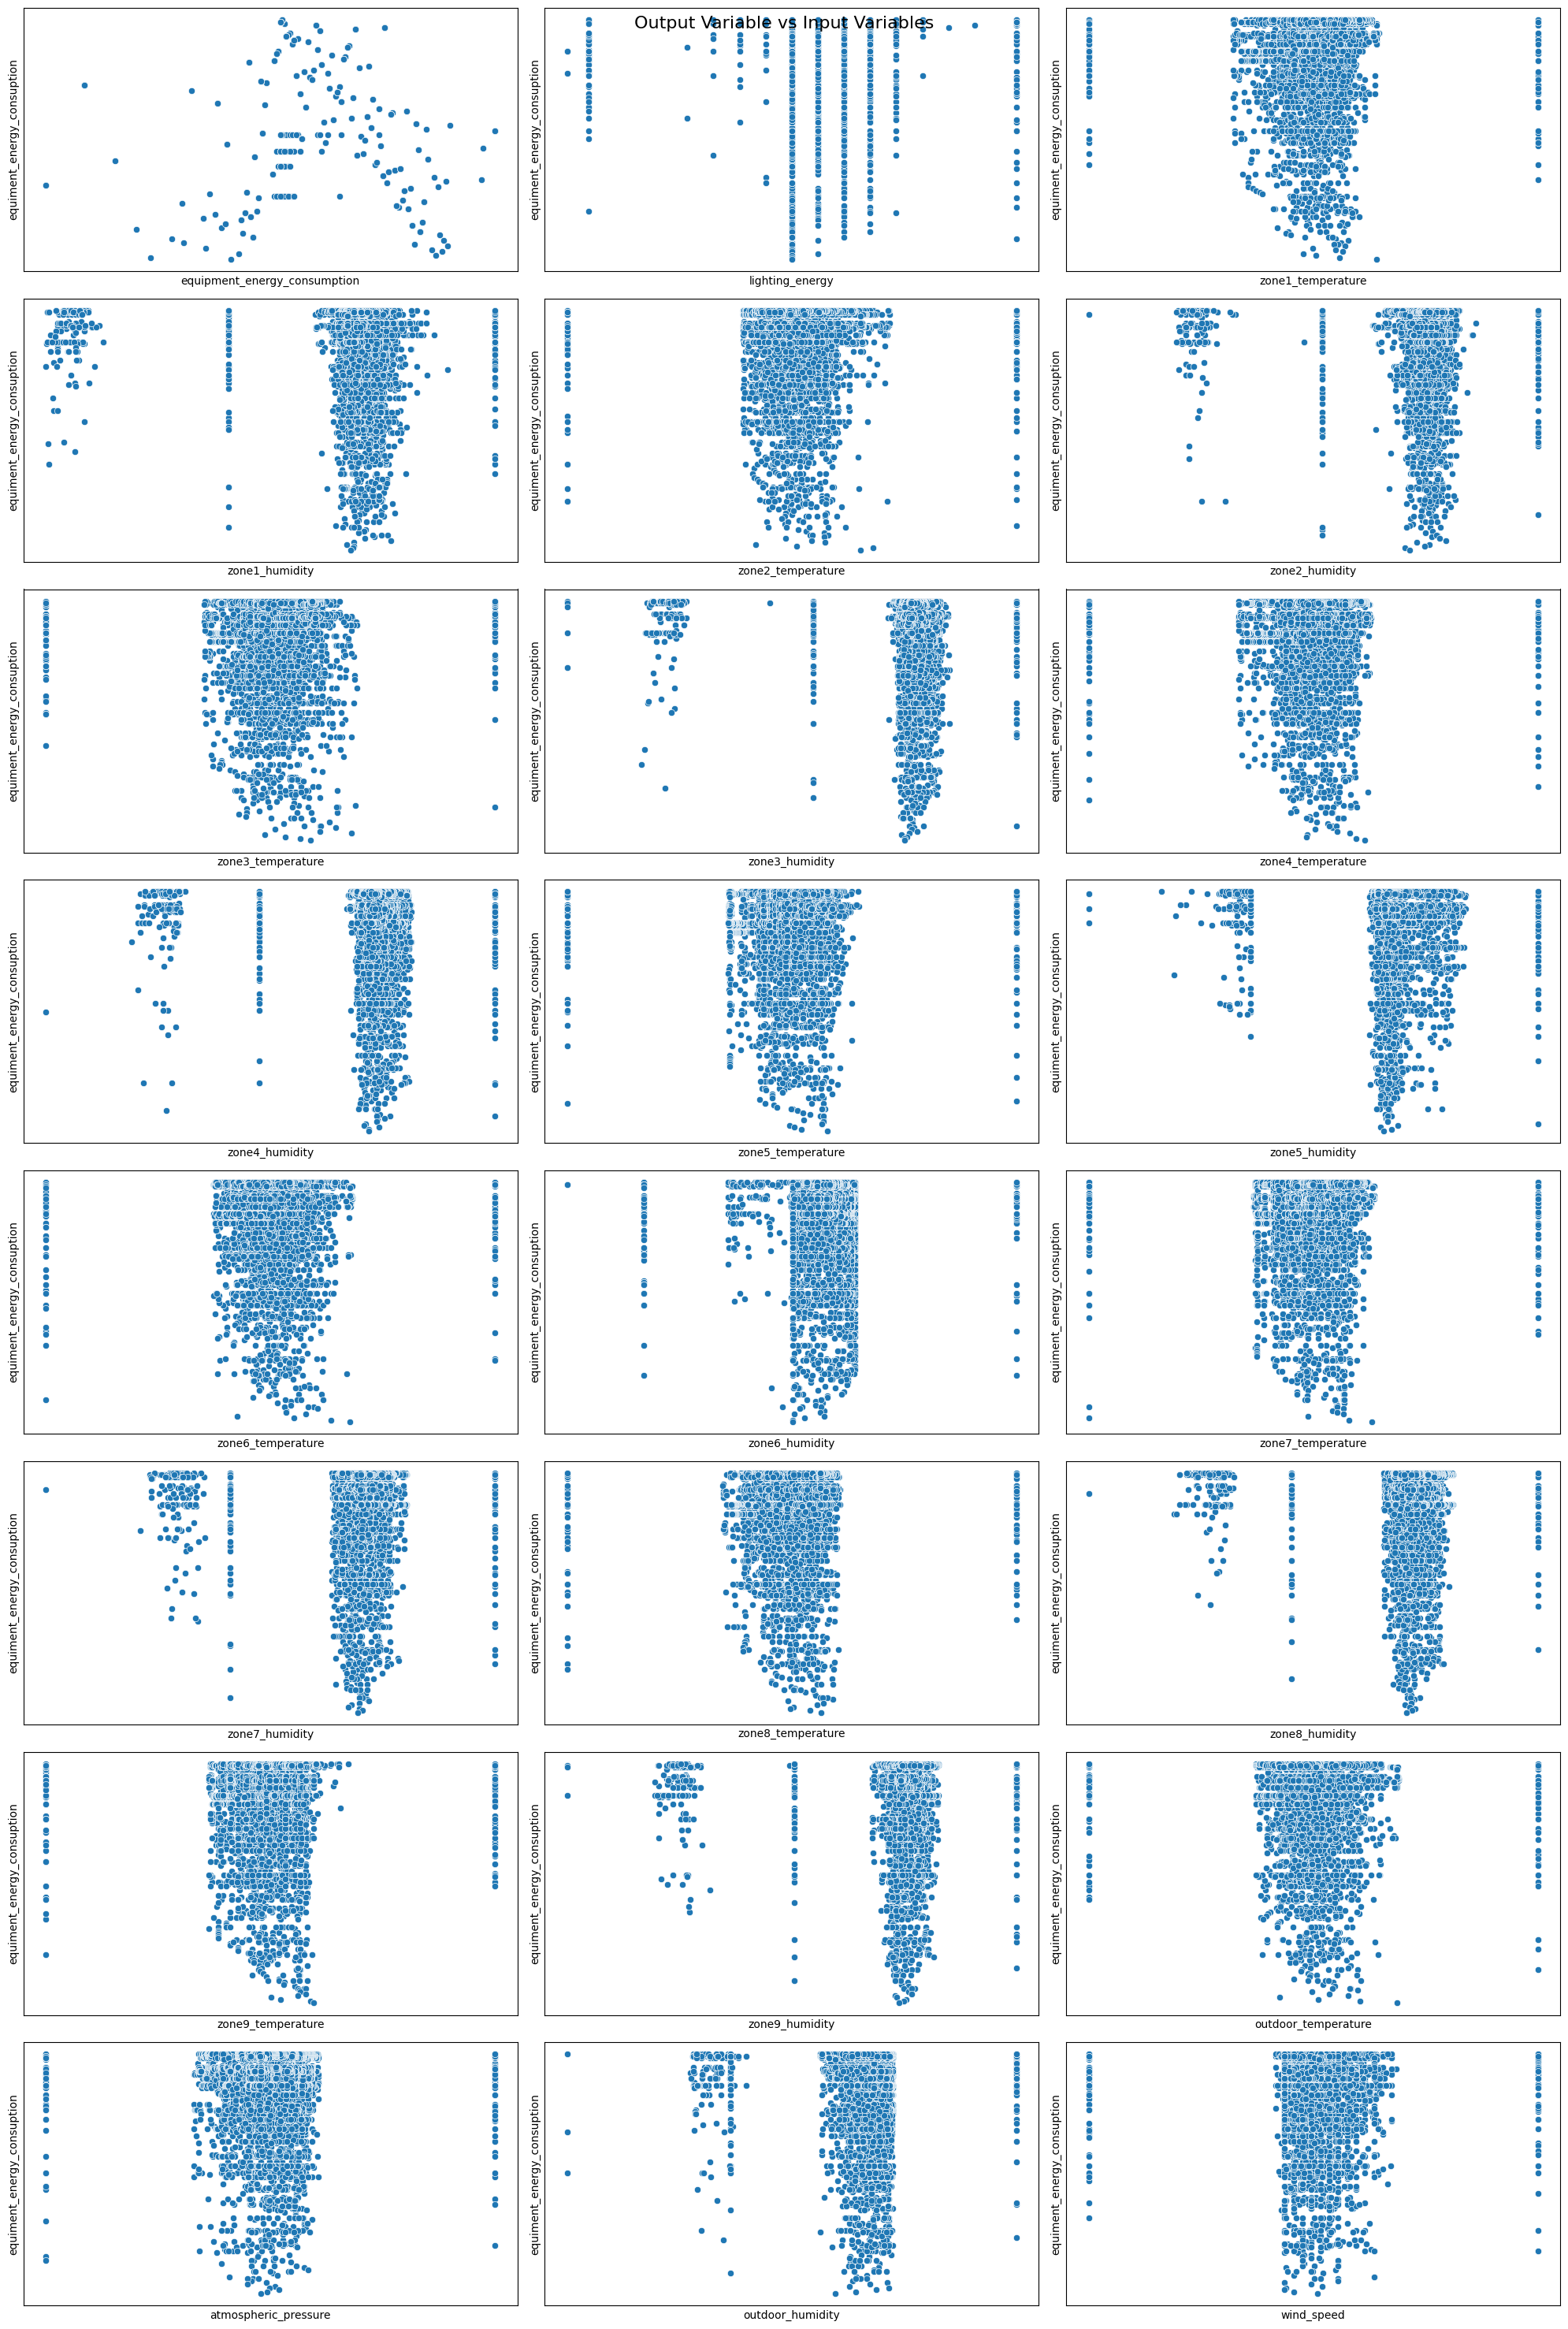

In [11]:
# Set up the subplot grid 
n_cols = 3  # Number of columns in the subplot grid
#n_rows = (len(input_cols) // n_cols + (1 if len(input_cols) % n_cols else 0)
n_rows=8
# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30))
fig.suptitle(f'Output Variable vs Input Variables', fontsize=16)

# Flatten axes for easy iteration (if n_rows > 1)
axes = axes.flatten()

# Plot each input variable against the output
for i, col in enumerate(cols_to_convert):
    if i < len(axes):  # Ensure we don't exceed subplot count
        sns.scatterplot(data=df_cleaned, x=col, y=df['equipment_energy_consumption'], ax=axes[i])
        #axes[i].set_title(f'{col} vs {col}')
        axes[i].set_xticks([])  # Remove x-axis numbers
        axes[i].set_yticks([])  # Remove y-axis numbers
        
        # Optional: Add light grid for trend reference
        axes[i].grid(True, linestyle='--', alpha=0.3)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('equiment_energy_consuption')

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [12]:
#tackling the negative values in energy column 
col_temp=df_cleaned.columns.drop('timestamp')
df[col_temp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  16013 non-null  object 
 1   lighting_energy               16048 non-null  object 
 2   zone1_temperature             15990 non-null  object 
 3   zone1_humidity                16056 non-null  object 
 4   zone2_temperature             16004 non-null  object 
 5   zone2_humidity                15990 non-null  float64
 6   zone3_temperature             16055 non-null  float64
 7   zone3_humidity                15979 non-null  float64
 8   zone4_temperature             16041 non-null  float64
 9   zone4_humidity                16076 non-null  float64
 10  zone5_temperature             16019 non-null  float64
 11  zone5_humidity                16056 non-null  float64
 12  zone6_temperature             16009 non-null  float64
 13  z

In [13]:
#If there is negative value filling it with NaN and after it we will do forward filling and backward filling 
df_cleaned[col_temp] = df_cleaned[col_temp].where(df_cleaned[col_temp] >= 0, np.nan)

In [14]:
#Performing forward and backward filling
df_cleaned[cols_to_convert] = df_cleaned[cols_to_convert].fillna(method='ffill').fillna(method='bfill')

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16857 non-null  float64       
 2   lighting_energy               16857 non-null  float64       
 3   zone1_temperature             16857 non-null  float64       
 4   zone1_humidity                16857 non-null  float64       
 5   zone2_temperature             16857 non-null  float64       
 6   zone2_humidity                16857 non-null  float64       
 7   zone3_temperature             16857 non-null  float64       
 8   zone3_humidity                16857 non-null  float64       
 9   zone4_temperature             16857 non-null  float64       
 10  zone4_humidity                16857 non-null  float64       
 11  zone5_temperature           

In [16]:
#feature engineering
# Make sure your 'timestamp' column is in datetime format
df_cleaned['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Extract useful time-based features
df_cleaned['hour'] = df_cleaned['timestamp'].dt.hour
df_cleaned['day_of_week'] = df_cleaned['timestamp'].dt.dayofweek
df_cleaned['month'] = df_cleaned['timestamp'].dt.month
df_cleaned['is_weekend'] = df_cleaned['day_of_week'].isin([5, 6]).astype(int)

# Add cyclical encoding for hour (for capturing circular time-of-day effect)
df_cleaned['hour_sin'] = np.sin(2 * np.pi * df_cleaned['hour'] / 24)
df_cleaned['hour_cos'] = np.cos(2 * np.pi * df_cleaned['hour'] / 24)

# OPTIONAL: Drop the original timestamp (not useful directly for training)
df_cleaned = df_cleaned.drop(columns=['timestamp'])

# Now `df` is ready for training with Random Forest


<Axes: >

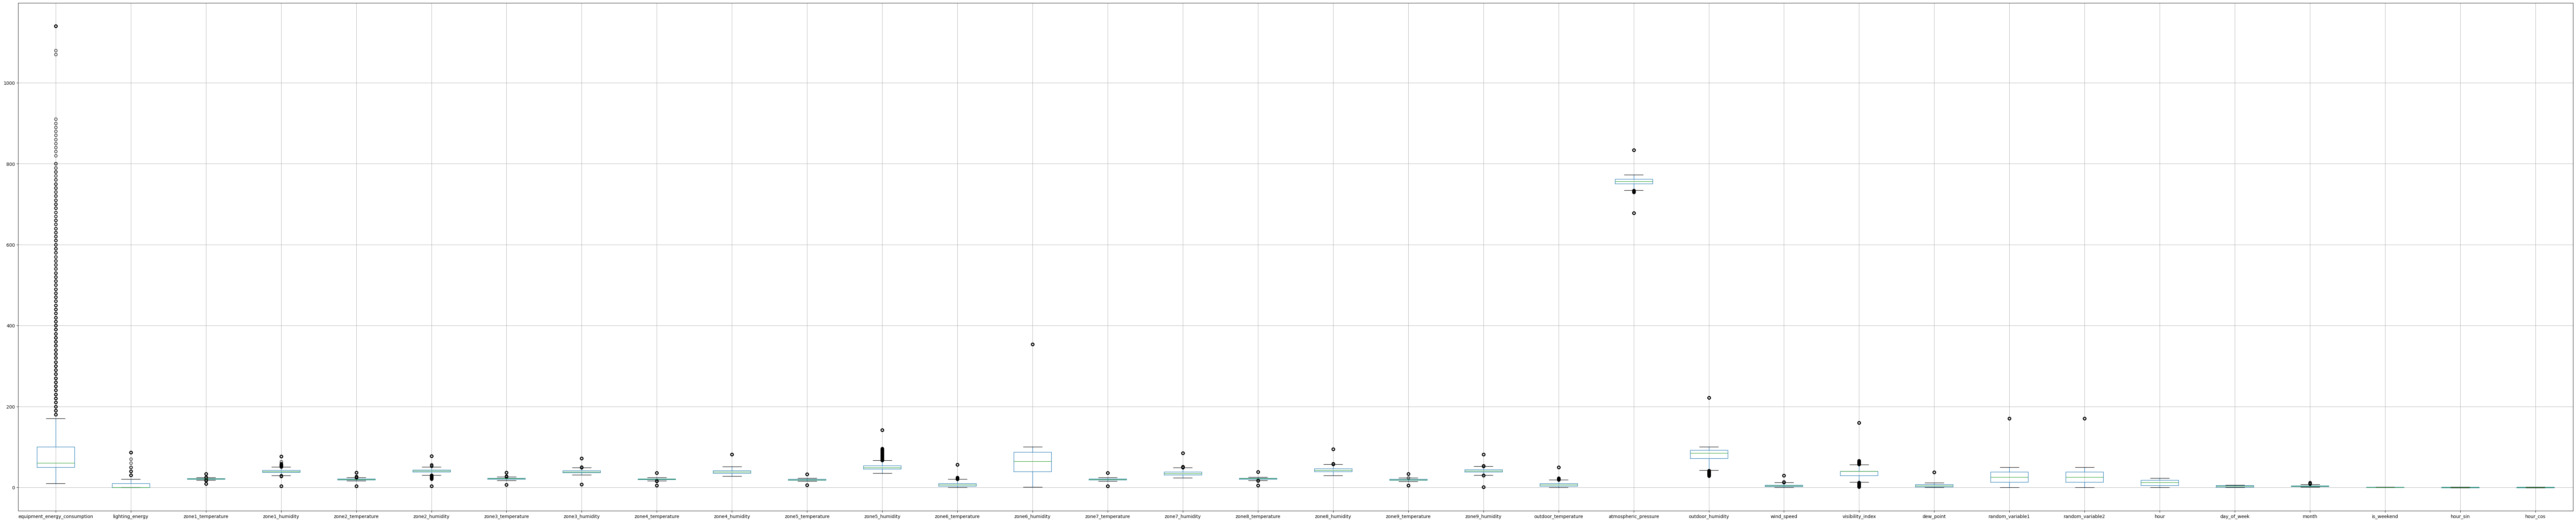

In [17]:
#Detection of Outlier as there are outliers in the data due to malfunctioning of sensor or other reason
#We can double click to zoon and see outliers
df_cleaned.boxplot(figsize=(100,20))

In [18]:
# Define function to remove outliers using IQR
def remove_outliers_iqr(df, columns, factor=10):
    df_clean = df.copy()
    for col in columns:
        if df_clean[col].dtype in ['float64', 'int64']:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Example: choose important columns to check (you can expand this list)
columns_to_check = [
    'equipment_energy_consumption',
    'lighting_energy',
    'zone1_temperature',
    'zone2_temperature',
    'outdoor_temperature'
]

# Apply outlier removal
df_no_outliers = remove_outliers_iqr(df_cleaned, columns_to_check)

# Print shape before and after
print("Before:", df_cleaned.shape)
print("After :", df_no_outliers.shape)


Before: (16857, 34)
After : (16539, 34)


<Axes: >

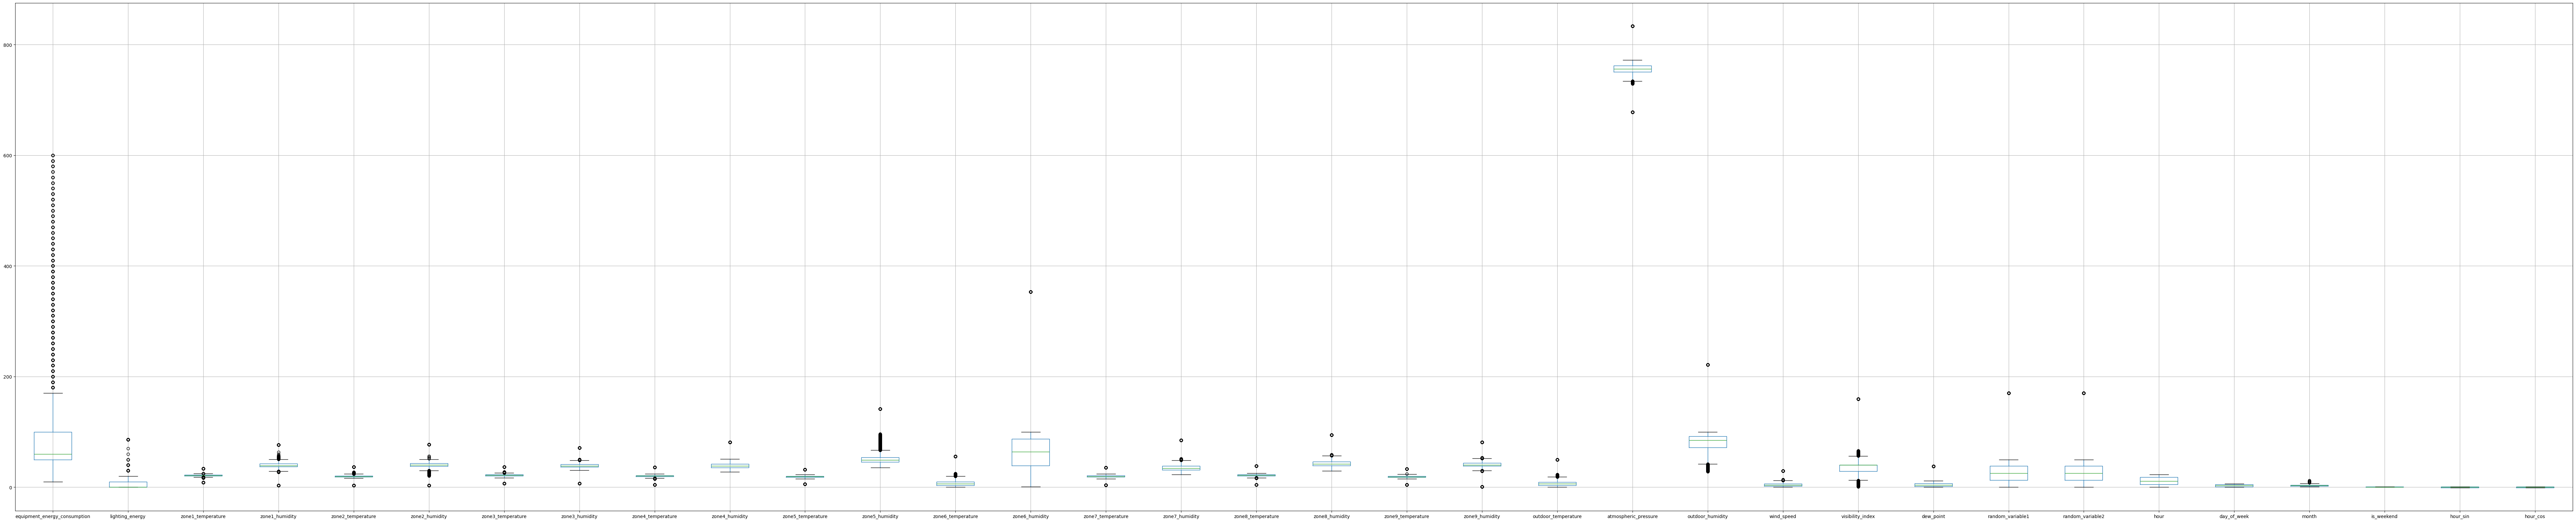

In [19]:
#We can see we have removed extreme outliers successfully
df_no_outliers.boxplot(figsize=(100,20))

In [20]:
#We can also see manually a particular column that i don't have extreme outliers
df_no_outliers['equipment_energy_consumption'].unique()

array([ 60.,  50.,  70., 230., 580., 430., 250., 100.,  90.,  80., 140.,
       120., 190., 110., 400., 390., 240.,  40.,  30., 310., 380., 370.,
        20., 260., 500., 450., 220., 170., 290., 130., 200., 210., 350.,
       300., 340., 150., 330., 420., 520., 360., 180., 550., 490., 410.,
       320., 270., 510., 460., 160., 480., 280., 560., 470., 440., 540.,
       530., 600.,  10., 570., 590.])

As we have performed EDA which is required to train Random forest. Now we start with spliting the data and training of the model

Text(0.5, 1.0, 'Heatmap showing the corelation')

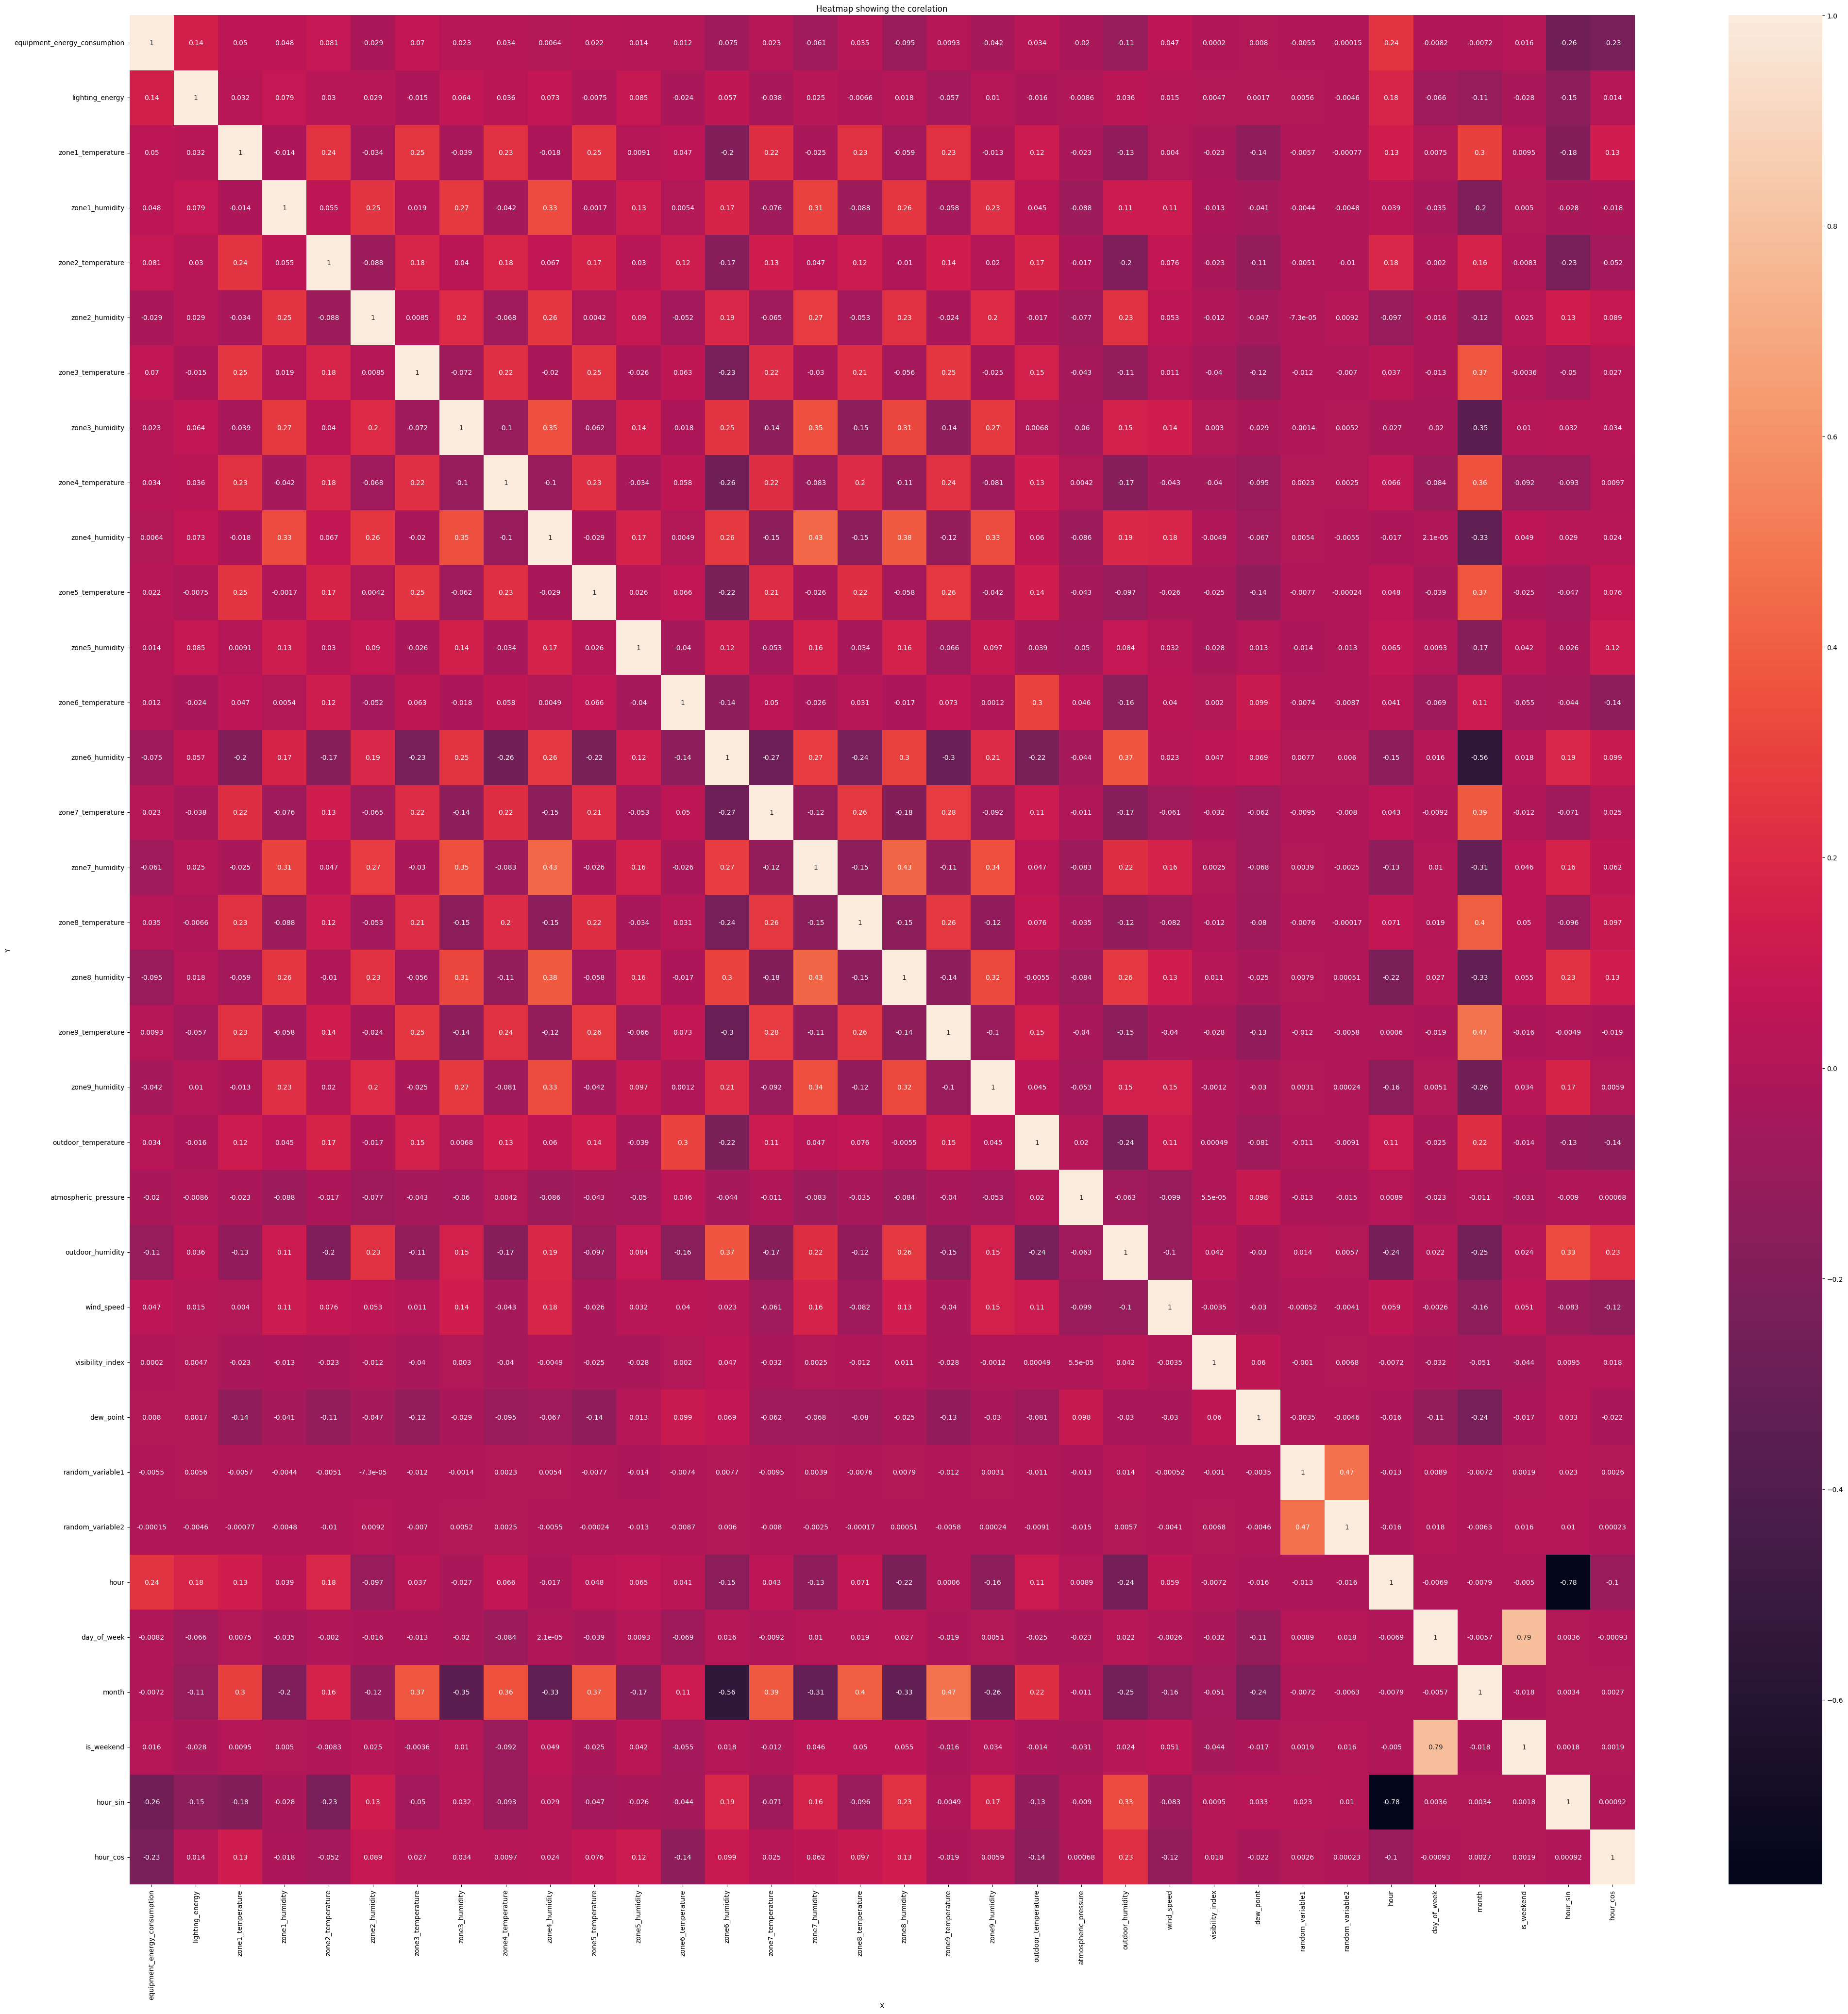

In [21]:
plt.figure(figsize=(50,50))
sns.heatmap(df_no_outliers[['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature',
       'zone1_humidity', 'zone2_temperature', 'zone2_humidity',
       'zone3_temperature', 'zone3_humidity', 'zone4_temperature',
       'zone4_humidity', 'zone5_temperature', 'zone5_humidity',
       'zone6_temperature', 'zone6_humidity', 'zone7_temperature',
       'zone7_humidity', 'zone8_temperature', 'zone8_humidity',
       'zone9_temperature', 'zone9_humidity', 'outdoor_temperature',
       'atmospheric_pressure', 'outdoor_humidity', 'wind_speed',
       'visibility_index', 'dew_point', 'random_variable1', 'random_variable2',
       'hour', 'day_of_week', 'month', 'is_weekend', 'hour_sin', 'hour_cos']].corr(),annot=True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Heatmap showing the corelation")

After seeing heat map we can remove 'hour', 'random_variable2', 'random_variable1', 'month', 'is_weekend' to increase model accuracy

# Model Trianing  

In [23]:
# Define features and target
X = df_no_outliers.drop(columns=['equipment_energy_consumption','hour','random_variable2','random_variable1','month','is_weekend'])
y = df_no_outliers['equipment_energy_consumption']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 59.66
MAE: 30.30
R² Score: 0.56


Comparing the different models using cross validation

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import numpy as np
models = {
    
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}



In [27]:
from sklearn.model_selection import KFold

# Create a 5-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print(f"{name} R² Scores: {scores}")
    print(f"{name} Mean R²: {np.mean(scores):.3f}")
    print("-" * 40)


Random Forest R² Scores: [0.54959383 0.53431537 0.52932356 0.57077376 0.53177987]
Random Forest Mean R²: 0.543
----------------------------------------
XGBoost R² Scores: [0.51040472 0.4621976  0.48482887 0.52083825 0.51067892]
XGBoost Mean R²: 0.498
----------------------------------------


hence, we can say random forest is out perfoming thr XG boost model